# Scrapping Amazon Reviews

In [1]:
#importing packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
#using requests which alows us to send HTTP requests using Python
def get_soup(url):
    url = url
    page =requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup

In [3]:
reviewlist = []
#fetching only data which is necessary like rating title and content given by the customers
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'content': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [4]:
#creating a loop from 1 to 100 reviews pages of the product
for x in range(1,100):
    soup = get_soup(f'https://www.amazon.in/Rockerz-370-Headphone-Bluetooth-Lightweight/product-reviews/B0856HNMR7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break
print('Done')

Getting page: 1
10
Getting page: 2
20
Getting page: 3
30
Getting page: 4
40
Getting page: 5
50
Getting page: 6
60
Getting page: 7
70
Getting page: 8
70
Getting page: 9
80
Getting page: 10
90
Getting page: 11
100
Getting page: 12
110
Getting page: 13
110
Getting page: 14
110
Getting page: 15
120
Getting page: 16
120
Getting page: 17
130
Getting page: 18
130
Getting page: 19
140
Getting page: 20
150
Getting page: 21
160
Getting page: 22
170
Getting page: 23
170
Getting page: 24
180
Getting page: 25
190
Getting page: 26
200
Getting page: 27
210
Getting page: 28
220
Getting page: 29
230
Getting page: 30
240
Getting page: 31
250
Getting page: 32
260
Getting page: 33
270
Getting page: 34
280
Getting page: 35
290
Getting page: 36
300
Getting page: 37
310
Getting page: 38
320
Getting page: 39
330
Getting page: 40
330
Getting page: 41
340
Getting page: 42
350
Getting page: 43
360
Getting page: 44
370
Getting page: 45
380
Getting page: 46
390
Getting page: 47
400
Getting page: 48
410
Getting pag

In [5]:
#creating dataframe of the list 
df = pd.DataFrame(reviewlist)
df

title  rating  \
0               I am very happy to buy this product...     5.0   
1                                     Amazingly Amazon     4.0   
2                                            base king     4.0   
3              The head phone plastic band broken out.     1.0   
4    Cheap Plastic, Average product.  Sound is dist...     2.0   
..                                                 ...     ...   
835                                               Good     4.0   
836                                         Wonderful!     5.0   
837                                          Excellent     5.0   
838  Fast delivery and jenue Products from  Amezon❤️❤️     5.0   
839  Good headphone at this price ..build material ...     3.0   

                                               content  
0                                  Nice product...👍👍..  
1    It says 8 hrs but since I use this to watch le...  
2    the base is really good. it a value for this r...  
3    This product was had manufacturing defect insi...  
4    Edit: After 1 year of usage.The headphone star...  
..                                                 ...  
835  The media could not be loaded.\n              ...  
836                         Very good quality and bass  
837                                  Excellent product  
838  Nice Sound Quality With a High Frequency of ba...  
839  Its good...nice product...but my headphone aft...  

[840 rows x 3 columns]

In [6]:
df.shape

(840, 3)

In [7]:
df['content'].unique

<bound method Series.unique of 0                                    Nice product...👍👍..
1      It says 8 hrs but since I use this to watch le...
2      the base is really good. it a value for this r...
3      This product was had manufacturing defect insi...
4      Edit: After 1 year of usage.The headphone star...
                             ...                        
835    The media could not be loaded.\n              ...
836                           Very good quality and bass
837                                    Excellent product
838    Nice Sound Quality With a High Frequency of ba...
839    Its good...nice product...but my headphone aft...
Name: content, Length: 840, dtype: object>

In [8]:
#combining two columns title and content to make a new column called reviews 
df["reviews"] = df["title"]+df["content"]
df.head()

title  rating  \
0             I am very happy to buy this product...     5.0   
1                                   Amazingly Amazon     4.0   
2                                          base king     4.0   
3            The head phone plastic band broken out.     1.0   
4  Cheap Plastic, Average product.  Sound is dist...     2.0   

                                             content  \
0                                Nice product...👍👍..   
1  It says 8 hrs but since I use this to watch le...   
2  the base is really good. it a value for this r...   
3  This product was had manufacturing defect insi...   
4  Edit: After 1 year of usage.The headphone star...   

                                             reviews  
0  I am very happy to buy this product...Nice pro...  
1  Amazingly AmazonIt says 8 hrs but since I use ...  
2  base kingthe base is really good. it a value f...  
3  The head phone plastic band broken out.This pr...  
4  Cheap Plastic, Average product.  Sound is dist...

In [9]:
#instead of droping the columns we can access the columns we need in further process by iloc 
amazon = df.iloc[:,[1,3]]
amazon

rating                                            reviews
0       5.0  I am very happy to buy this product...Nice pro...
1       4.0  Amazingly AmazonIt says 8 hrs but since I use ...
2       4.0  base kingthe base is really good. it a value f...
3       1.0  The head phone plastic band broken out.This pr...
4       2.0  Cheap Plastic, Average product.  Sound is dist...
..      ...                                                ...
835     4.0  GoodThe media could not be loaded.\n          ...
836     5.0               Wonderful!Very good quality and bass
837     5.0                         ExcellentExcellent product
838     5.0  Fast delivery and jenue Products from  Amezon❤...
839     3.0  Good headphone at this price ..build material ...

[840 rows x 2 columns]

In [10]:
#now we have more information in less columns 

In [11]:
!pip install data-purifier 

In [12]:
# !pip install spacy download en_core_web_sm

In [13]:
import datapurifier as dp
from datapurifier import Mleda
from datapurifier import Nlpeda
from datapurifier import Nlpurifier 

import seaborn as sns 
import pandas as pd 
import numpy as np

print (dp.__version__)

0.3.4


In [14]:
amazon

rating                                            reviews
0       5.0  I am very happy to buy this product...Nice pro...
1       4.0  Amazingly AmazonIt says 8 hrs but since I use ...
2       4.0  base kingthe base is really good. it a value f...
3       1.0  The head phone plastic band broken out.This pr...
4       2.0  Cheap Plastic, Average product.  Sound is dist...
..      ...                                                ...
835     4.0  GoodThe media could not be loaded.\n          ...
836     5.0               Wonderful!Very good quality and bass
837     5.0                         ExcellentExcellent product
838     5.0  Fast delivery and jenue Products from  Amezon❤...
839     3.0  Good headphone at this price ..build material ...

[840 rows x 2 columns]

In [15]:
import datapurifier as dp
pure = Nlpurifier(amazon, "reviews")


GridspecLayout(children=(Checkbox(value=False, description='Drop Null Rows', indent=False, layout=Layout(grid_…


Convert Word to its Base Form


interactive(children=(RadioButtons(description='Technique:', options=('None', 'Stemming', 'Lemmatization'), va…

Remove Top Common Words


interactive(children=(Checkbox(value=False, description='Remove Top Common Words'), Output()), _dom_classes=('…

Remove Top Rare Words


interactive(children=(Checkbox(value=False, description='Remove Top Rare Words'), Output()), _dom_classes=('wi…

Button(description='Start Purifying', style=ButtonStyle())

Dataframe contains 840 rows and 3 columns

There is no null rows present.

Starting execution of 'lower' function, Please wait...
Finished execution of 'lower' function in 0.002 secs

Starting execution of 'contraction_to_expansion' function, Please wait...
Finished execution of 'contraction_to_expansion' function in 0.049 secs

Starting execution of 'count_emails' function, Please wait...
Finished execution of 'count_emails' function in 0.017 secs

Starting execution of 'count_urls' function, Please wait...
Finished execution of 'count_urls' function in 0.005 secs

Starting execution of 'get_word_count' function, Please wait...
type <obj>.word_count for getting word count series
Finished execution of 'get_word_count' function in 0.027 secs

Starting execution of 'remove_numbers' function, Please wait...
Finished execution of 'remove_numbers' function in 0.005 secs

Starting execution of 'remove_html_tags' function, Please wait...
Finished execution of 'remove_html_tags' function in 0.

In [101]:
from IPython.display import display

In [102]:
display(pure.df)

rating                                            reviews  \
0       5.0                     happy buy productnice product    
1       4.0  amazingly amazonit hrs use watch lecture hrs b...   
2       4.0  base kingthe base good value range moneyi like...   
3       1.0  head phone plastic band break outthis product ...   
4       2.0  cheap plastic average product sound distort hi...   
5       5.0  value moneysound crystal clearbass pretty good...   
6       1.0  buy pleasebass disgusting range good try pubg ...   
7       1.0  cheap qualityi month headphone literally break...   
8       4.0  month reviewmarvelous performanceif watch movi...   
9       1.0  break monthi huge fan boat purchase headphone ...   
10      4.0  product great recieved product instead brand n...   
11      1.0  boat product againdid month break moth amazon ...   
12      4.0                           value money productnice    
13      1.0  bad productsplz buy product half hour ear star...   
14      5.0  perfect free worrieswell writing review month ...   
15      5.0  nice soundboat rocker sound product rs treble ...   
16      5.0  amazing btconfusion headphonesthe medium load ...   
17      1.0  useless headphonespoor basic headphone highly ...   
18      1.0  break month return warranty periodproduct brea...   
19      1.0  worth price productno voice cancellation produ...   
20      1.0  goodmy ear head stare pain uncomfortable bass ...   
21      4.0  pro consi like start pro sound good battery li...   
22      5.0  goodafter reading review people like people lo...   
23      5.0                           ok supersuper mind blow    
24      2.0  bad product wish star itthis product poor buil...   
25      2.0  problem itthe headphone kinda good term audio ...   
26      3.0  sound quality great build quality poorsound go...   
27      2.0  poor ergonomicsbought month agowork fine aux c...   
28      4.0  bluetooth connectivitysound quality doubt good...   
29      1.0  disappointed duplicate productdont purchase bo...   
30      5.0  good priceconfusioni buy attend online class c...   
31      1.0  okay greatthis product okay greati rate - star...   
32      5.0  battery lifei earphone month sure fairly satis...   
33      4.0  average productfor price bluetooth star produc...   
34      3.0  uncomfortable pain earsi headphone day experie...   
35      5.0  work good sound quality vocal crystal clear ni...   
36      1.0  stupid waste moneyi believe experience headpho...   
37      5.0  noise cancellation son hear right happyfaceors...   
38      1.0  worth itwa work fine st week start hear crackl...   
39      1.0  technical issueit month productmy review absol...   
40      4.0  average headphone good mic qualityhey purchase...   
41      5.0  decent product reasonable pricefirst hat boat ...   
42      2.0  cheap version high pricethe product come good ...   
43      3.0  balanced sound longtime ache ear cause cufs ki...   
44      3.0  good product price rangethe medium load sound ...   
45      1.0  cheap plastic average product break month bad ...   
46      1.0  bad mic mic workingbought receive amazon june ...   
47      3.0  bass goodbass sound quality good making end he...   
48      4.0  averagethis headphone good non - bass lover li...   
49      5.0  cristal clear sound stylish perfect moment lif...   
50      5.0  great product excellent service amazonamazon a...   
51      5.0  exellent buy lot good qualitythis brilliant pr...   
52      5.0  excellent head phone great value moneythis par...   
53      2.0  good sound quality poor quality plasticpro - s...   
54      5.0  single subhamit cool stylish high quality hd b...   
55      4.0  good betterit fragile wire come try extend hea...   
56      3.0  trouble bluetooth connectivityit problem bluet...   
57      3.0  mic disappointingthe quality good dissatisfied...   
58      1.0  non returnable product comfortablesound qualit...   
59      1.0  recommendedi buy week agost thin

In [103]:
pure.df

rating                                            reviews  \
0       5.0                     happy buy productnice product    
1       4.0  amazingly amazonit hrs use watch lecture hrs b...   
2       4.0  base kingthe base good value range moneyi like...   
3       1.0  head phone plastic band break outthis product ...   
4       2.0  cheap plastic average product sound distort hi...   
5       5.0  value moneysound crystal clearbass pretty good...   
6       1.0  buy pleasebass disgusting range good try pubg ...   
7       1.0  cheap qualityi month headphone literally break...   
8       4.0  month reviewmarvelous performanceif watch movi...   
9       1.0  break monthi huge fan boat purchase headphone ...   
10      4.0  product great recieved product instead brand n...   
11      1.0  boat product againdid month break moth amazon ...   
12      4.0                           value money productnice    
13      1.0  bad productsplz buy product half hour ear star...   
14      5.0  perfect free worrieswell writing review month ...   
15      5.0  nice soundboat rocker sound product rs treble ...   
16      5.0  amazing btconfusion headphonesthe medium load ...   
17      1.0  useless headphonespoor basic headphone highly ...   
18      1.0  break month return warranty periodproduct brea...   
19      1.0  worth price productno voice cancellation produ...   
20      1.0  goodmy ear head stare pain uncomfortable bass ...   
21      4.0  pro consi like start pro sound good battery li...   
22      5.0  goodafter reading review people like people lo...   
23      5.0                           ok supersuper mind blow    
24      2.0  bad product wish star itthis product poor buil...   
25      2.0  problem itthe headphone kinda good term audio ...   
26      3.0  sound quality great build quality poorsound go...   
27      2.0  poor ergonomicsbought month agowork fine aux c...   
28      4.0  bluetooth connectivitysound quality doubt good...   
29      1.0  disappointed duplicate productdont purchase bo...   
30      5.0  good priceconfusioni buy attend online class c...   
31      1.0  okay greatthis product okay greati rate - star...   
32      5.0  battery lifei earphone month sure fairly satis...   
33      4.0  average productfor price bluetooth star produc...   
34      3.0  uncomfortable pain earsi headphone day experie...   
35      5.0  work good sound quality vocal crystal clear ni...   
36      1.0  stupid waste moneyi believe experience headpho...   
37      5.0  noise cancellation son hear right happyfaceors...   
38      1.0  worth itwa work fine st week start hear crackl...   
39      1.0  technical issueit month productmy review absol...   
40      4.0  average headphone good mic qualityhey purchase...   
41      5.0  decent product reasonable pricefirst hat boat ...   
42      2.0  cheap version high pricethe product come good ...   
43      3.0  balanced sound longtime ache ear cause cufs ki...   
44      3.0  good product price rangethe medium load sound ...   
45      1.0  cheap plastic average product break month bad ...   
46      1.0  bad mic mic workingbought receive amazon june ...   
47      3.0  bass goodbass sound quality good making end he...   
48      4.0  averagethis headphone good non - bass lover li...   
49      5.0  cristal clear sound stylish perfect moment lif...   
50      5.0  great product excellent service amazonamazon a...   
51      5.0  exellent buy lot good qualitythis brilliant pr...   
52      5.0  excellent head phone great value moneythis par...   
53      2.0  good sound quality poor quality plasticpro - s...   
54      5.0  single subhamit cool stylish high quality hd b...   
55      4.0  good betterit fragile wire come try extend hea...   
56      3.0  trouble bluetooth connectivityit problem bluet...   
57      3.0  mic disappointingthe quality good dissatisfied...   
58      1.0  non returnable product comfortablesound qualit...   
59      1.0  recommendedi buy week agost thin

Shape of DataFrame:  (840, 6)

Sample of Dataframe:


rating                                            reviews  \
88      4.0  boat rocker rock start thing come inside boat ...   
554     4.0                         good sound qualityi happy    
231     5.0  good blue tooth head phonefor priceconfusion g...   
809     4.0  good purchase purchase year ago write review y...   
112     1.0  good qualitybattery good compare headphone sou...   
367     4.0  conectivity good perfectit great mean look goo...   
759     2.0  bad sound qualitysound bursting problem connec...   
360     3.0  bettersound quality bass quality durability ov...   
814     4.0  replace productthe product good right left pac...   
101     5.0  expectedthe product awesome product day contin...   

                                              original emails  emails_counts  \
88   boAt Rockers really Rocks !Starting with the w...     []              0   
554                    Good sound qualityI am so happy     []              0   
231  Good Blue tooth head phoneFor that price(999),...     []              0   
809  good purchase as i have purchased 1 year ago a...     []              0   
112  Not good qualityBattery is good but as compare...     []              0   
367  ITS CONECTIVITY IS NOT THAT MUCH GOOD BUT OTHE...     []              0   
759  Worst sound qualitySound bursting problem. Whi...     []              0   
360  BetterSound quality 8/10Bass quality 🤙👍 7/10Du...     []              0   
814  Replace my productThe product is very good but...     []              0   
101  More than expected!!The product is just awesom...     []              0   

     urls_counts  
88             0  
554            0  
231            0  
809            0  
112            0  
367            0  
759            0  
360            0  
814            0  
101            0


There are total 3 categorical and 3 numerical columns

Description of Data:



rating  emails_counts  urls_counts
count  840.000000          840.0        840.0
mean     3.361905            0.0          0.0
std      1.579812            0.0          0.0
min      1.000000            0.0          0.0
25%      2.000000            0.0          0.0
50%      4.000000            0.0          0.0
75%      5.000000            0.0          0.0
max      5.000000            0.0          0.0

Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         840 non-null    float64
 1   reviews        840 non-null    object 
 2   original       840 non-null    object 
 3   emails         840 non-null    object 
 4   emails_counts  840 non-null    int64  
 5   urls_counts    840 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 39.5+ KB


None


Congrats!!, The Dataframe has NO NULL VALUES


Interactive Value Count Plot:



Output()


Joint Plot:



Output()


Correlation Heatmap Plot:



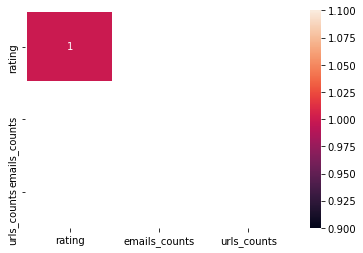

Pair Plot:



Output()


Pie Plot:



interactive(children=(Dropdown(description='Columns:', options=('reviews', 'original', 'emails'), value='revie…

In [104]:
mleda=Mleda(pure.df)

In [105]:
amazon=pure.df
amazon['original']= df['reviews']
cols=amazon.columns.tolist()
cols = cols[-1:]+cols[:-1]
amazon= amazon[cols]
amazon

urls_counts  rating                                            reviews  \
0              0     5.0                     happy buy productnice product    
1              0     4.0  amazingly amazonit hrs use watch lecture hrs b...   
2              0     4.0  base kingthe base good value range moneyi like...   
3              0     1.0  head phone plastic band break outthis product ...   
4              0     2.0  cheap plastic average product sound distort hi...   
5              0     5.0  value moneysound crystal clearbass pretty good...   
6              0     1.0  buy pleasebass disgusting range good try pubg ...   
7              0     1.0  cheap qualityi month headphone literally break...   
8              0     4.0  month reviewmarvelous performanceif watch movi...   
9              0     1.0  break monthi huge fan boat purchase headphone ...   
10             0     4.0  product great recieved product instead brand n...   
11             0     1.0  boat product againdid month break moth amazon ...   
12             0     4.0                           value money productnice    
13             0     1.0  bad productsplz buy product half hour ear star...   
14             0     5.0  perfect free worrieswell writing review month ...   
15             0     5.0  nice soundboat rocker sound product rs treble ...   
16             0     5.0  amazing btconfusion headphonesthe medium load ...   
17             0     1.0  useless headphonespoor basic headphone highly ...   
18             0     1.0  break month return warranty periodproduct brea...   
19             0     1.0  worth price productno voice cancellation produ...   
20             0     1.0  goodmy ear head stare pain uncomfortable bass ...   
21             0     4.0  pro consi like start pro sound good battery li...   
22             0     5.0  goodafter reading review people like people lo...   
23             0     5.0                           ok supersuper mind blow    
24             0     2.0  bad product wish star itthis product poor buil...   
25             0     2.0  problem itthe headphone kinda good term audio ...   
26             0     3.0  sound quality great build quality poorsound go...   
27             0     2.0  poor ergonomicsbought month agowork fine aux c...   
28             0     4.0  bluetooth connectivitysound quality doubt good...   
29             0     1.0  disappointed duplicate productdont purchase bo...   
30             0     5.0  good priceconfusioni buy attend online class c...   
31             0     1.0  okay greatthis product okay greati rate - star...   
32             0     5.0  battery lifei earphone month sure fairly satis...   
33             0     4.0  average productfor price bluetooth star produc...   
34             0     3.0  uncomfortable pain earsi headphone day experie...   
35             0     5.0  work good sound quality vocal crystal clear ni...   
36             0     1.0  stupid waste moneyi believe experience headpho...   
37             0     5.0  noise cancellation son hear right happyfaceors...   
38             0     1.0  worth itwa work fine st week start hear crackl...   
39             0     1.0  technical issueit month productmy review absol...   
40             0     4.0  average headphone good mic qualityhey purchase...   
41             0     5.0  decent product reasonable pricefirst hat boat ...   
42             0     2.0  cheap version high pricethe product come good ...   
43             0     3.0  balanced sound longtime ache ear cause cufs ki...   
44             0     3.0  good product price rangethe medium load sound ...   
45             0     1.0  cheap plastic average product break month bad ...   
46             0     1.0  bad mic mic workingbought receive amazon june ...   
47             0     3.0  bass goodbass sound quality good making end he...   
48             0     4.0  averagethis headphone good non - bass lover li...   
49             0     5.0  cristal clear sound stylish p

### N_gram

In [106]:
from textblob import Word
from textblob import TextBlob

In [107]:
#bigrams
TextBlob(amazon['reviews'] [0]).ngrams(2)

[WordList(['happy', 'buy']),
 WordList(['buy', 'productnice']),
 WordList(['productnice', 'product'])]

In [108]:
#trigrams
TextBlob(amazon['reviews'] [0]).ngrams(3)

[WordList(['happy', 'buy', 'productnice']),
 WordList(['buy', 'productnice', 'product'])]

# CountVectorizer

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
cv=CountVectorizer()
reviewcv=cv.fit_transform(amazon['reviews'])
print(cv.get_feature_names())

['aache', 'aalo', 'aaye', 'ab', 'abd', 'abhi', 'ability', 'able', 'abour', 'absolute', 'absolutely', 'abt', 'abv', 'ac', 'accept', 'acceptable', 'accessory', 'accha', 'accord', 'accurate', 'acha', 'achcha', 'ache', 'achi', 'acoorde', 'acoustic', 'acpecte', 'activate', 'actually', 'ad', 'add', 'adjust', 'adjustable', 'adjustment', 'admirable', 'adult', 'advantage', 'advantagesconfusionsound', 'advertising', 'advice', 'advise', 'affordable', 'afordable', 'aftermarket', 'ag', 'againdid', 'againnot', 'age', 'ago', 'agopls', 'agost', 'agowork', 'ahead', 'aheadnice', 'air', 'airspace', 'alertomg', 'alibabacom', 'allow', 'allproduct', 'allsound', 'allthe', 'alos', 'alot', 'alreadyproduct', 'alright', 'alsogood', 'alsosound', 'alternate', 'alternative', 'altogether', 'aman', 'amateur', 'amaze', 'amazing', 'amazingb', 'amazinggood', 'amazingi', 'amazingit', 'amazingjust', 'amazingly', 'amazingman', 'amazingsound', 'amazingthe', 'amazon', 'amazonamazon', 'amazonit', 'amezonnice', 'amountnot', 'a

In [111]:
cv = CountVectorizer()

reviewcv = cv.fit_transform(amazon['reviews'] )
sum_words = reviewcv.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['words', 'count']


pd.options.display.max_rows=None
wf_df

words  count
0                                                  good    688
1                                               quality    517
2                                               product    496
3                                                 sound    393
4                                             headphone    296
5                                                   buy    216
6                                                   ear    211
7                                                  bass    165
8                                                   use    156
9                                                  work    135
10                                                break    133
11                                                 like    125
12                                                price    124
13                                                  bad    124
14                                            bluetooth    123
15                                                 boat    122
16                                              battery    115
17                                                month    104
18                                                 time    100
19                                                  day     98
20                                                 nice     89
21                                                money     79
22                                                 long     77
23                                                noise     73
24                                                great     71
25                                                build     70
26                                         connectivity     68
27                                                start     67
28                                         cancellation     66
29                                                 wear     64
30                                               return     63
31                                                thing     63
32                                                 poor     62
33                                                 hour     62
34                                                 look     62
35                                                 pain     61
36                                                cable     57
37                                                music     57
38                                               charge     57
39                                          comfortable     56
40                                                worth     54
41                                              awesome     54
42                                                 head     52
43                                              connect     52
44                                                  aux     52
45                                              problem     52
46                                                  mic     51
47                                                  low     49
48                                                 feel     49
49                                                 life     49
50                                                value     47
51                                              plastic     47
52                                               volume     46
53                                               amazon     46
54                                                range     45
55                                                cheap     45
56                                             purchase     44
57                                                phone     43
58                                                 come     43
59                                                 love     43
60                                                 high     42
61                                              headset     42
62                                              amazing     41
63                

### CountVectorizer with Bi-gram & Tri-gram

Bi-gram

In [112]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [113]:
top2_words = get_top_n2_words(amazon['reviews'], n=5000) 
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df

Bi-gram  Freq
0                                         sound quality   195
1                                          quality good    88
2                                    noise cancellation    53
3                                          good product    53
4                                         build quality    50
5                                            good sound    50
6                                bluetooth connectivity    44
7                                          battery life    43
8                                           medium load    37
9                                           buy product    36
10                                            aux cable    34
11                                         product good    32
12                                       good headphone    29
13                                           good price    28
14                                         good quality    26
15                                       battery backup    26
16                                       headphone good    25
17                                          value money    25
18                                            long time    23
19                                         bass quality    23
20                                            ear start    22
21                                          price range    22
22                                            bass good    21
23                                            stop work    21
24                                             ear pain    21
25                                         boat rockerz    19
26                                          break month    18
27                                             pain ear    18
28                                      quality product    18
29                                         good battery    17
30                                         online class    17
31                                         poor quality    17
32                                         quality bass    17
33                                         nice product    17
34                                            good bass    16
35                                        recommend buy    16
36                                          quality bad    16
37                                        quality sound    16
38                                         boat product    15
39                                          waste money    15
40                                           head phone    14
41                                           good thing    14
42                                           sound good    14
43                                         quality poor    14
44                                            feel like    13
45                                           start pain    13
46                                            wear long    13
47                                    quality headphone    12
48                                              ear cup    11
49                                            look good    11
50                                     comfortable wear    11
51                                       good bluetooth    11
52                                    connectivity good    11
53                                           start hurt    11
54                                        work properly    11
55                                           sound bass    11
56                                        cheap plastic    10
57                                      product quality    10
58                                      headphone price    10
59                                             hurt ear    10
60                                          bad quality    10
61                                           little bit    10
62                                       boat headphone    10
63                                        product price    10
64                

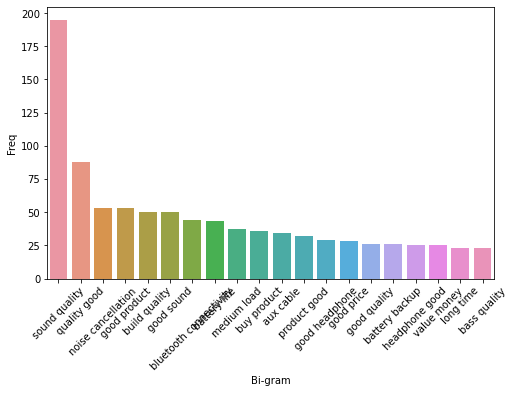

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (8, 5)) #figure size of the visualization
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.show()

Tri-gram

In [115]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [116]:
top3_words = get_top_n3_words(amazon['reviews'] , n=5000)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

top3_df

Tri-gram  Freq
0                                    sound quality good    44
1                                    good sound quality    27
2                                    sound quality bass    11
3                                        ear start pain    10
4                           bluetooth connectivity good     9
5                        quality bluetooth connectivity     9
6                               noise cancellation good     8
7                                     good battery life     7
8                           good bluetooth connectivity     7
9                                        ear start hurt     7
10                                    bass quality good     7
11                                   build quality good     6
12                                     buy online class     6
13                                        use long time     6
14                              good noise cancellation     6
15                                     good price range     6
16                              headphone sound quality     6
17                                product sound quality     6
18                                sound quality awesome     6
19                                  great sound quality     6
20                              sound quality bluetooth     6
21                                     medium load good     6
22                                  good battery backup     5
23                                 overall good product     5
24                                recommend buy product     5
25                                    build quality bad     5
26                                       cause pain ear     5
27                               quality good bluetooth     5
28                                    medium load sound     5
29                                   good build quality     5
30                                   quality good price     5
31                           quality noise cancellation     5
32                                    quality good bass     5
33                                sound quality amazing     5
34                                    battery life good     5
35                               productthe medium load     5
36                                   product good price     5
37                                       wear long time     5
38                                        long time ear     5
39                                customer care service     4
40                                       hour ear start     4
41                              bass noise cancellation     4
42                           product noise cancellation     4
43                                  return window close     4
44                                  battery backup good     4
45                                   sound quality poor     4
46                                 good headphone price     4
47                                  product value money     4
48                                  sound quality noise     4
49                                 sound quality pretty     4
50                               good quality headphone     4
51                                    long battery life     4
52                                  sound quality clear     4
53                                   product good sound     4
54                                   bass sound quality     4
55                                    sound quality bad     4
56                                   sound bass quality     4
57                                   like sound quality     4
58                                   love sound quality     4
59                                   nice sound quality     4
60                         product manufacturing defect     3
61                          manufacturing defect inside     3
62                                defect inside plastic     3
63                                  inside plastic band     3
64               

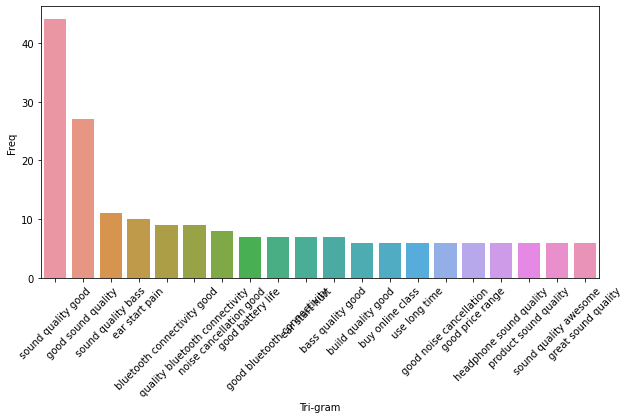

In [117]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])
plt.show()

# Named Entity Recognition (NER)

In [118]:
import string 
import re #regular expression
import spacy

In [119]:
nlp = spacy.load("en_core_web_sm")

one_block = str(amazon['reviews'])
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [120]:
#nouns and verbs in the text
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

['buy', 'productnice', 'product', 'hrs', 'use', 'base', 'kingthe', 'base', 'value', 'range', 'head', 'phone', 'plastic', 'band', 'break', 'outthis', 'product', 'product', 'sound', 'distort', 'value', 'crystal', 'clearbass', 'buy', 'pleasebass', 'range', 'good', 'try', 'pubg', 'headphone', 'break', 'month', 'fan', 'boat', 'purchase', 'headphone', 'product', 'product', 'brand', 'boat', 'product', 'againdid', 'value', 'money', 'productnice', 'buy', 'product', 'hour', 'ear', 'star', 'worrieswell', 'writing', 'review', 'month', 'soundboat', 'rocker', 'sound', 'product', 'rs', 'btconfusion', 'medium', 'load', 'headphone', 'break', 'month', 'return', 'warranty', 'periodproduct', 'price', 'productno', 'voice', 'cancellation', 'produ', 'pain', 'bass', 'consi', 'start', 'sound', 'battery', 'goodafter', 'reading', 'review', 'people', 'people', 'product', 'wish', 'product', 'buil', 'problem', 'headphone', 'term', 'audio', 'quality', 'build', 'quality', 'poorsound', 'go', 'ergonomicsbought', 'month

In [121]:

len(nouns_verbs)

3130

In [122]:
#Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
#with collected nouns and verbs
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['words','count']
wd_df

words  count
0                     product    222
1                     quality    208
2                       sound    116
3                   headphone    109
4                         buy     82
5                       price     52
6                        work     44
7                       month     43
8                       break     37
9                        bass     36
10                       boat     34
11                        use     33
12                      value     33
13                    battery     33
14                      money     30
15                        ear     30
16                       load     30
17                     medium     28
18                        day     28
19                      noise     23
20                      build     22
21                  bluetooth     22
22                       love     21
23                      thing     20
24                       look     18
25                     review     16
26                       head     15
27                      waste     14
28                     expect     14
29                       good     13
30                     return     13
31                       come     13
32               connectivity     13
33                   purchase     12
34                      music     12
35                   material     12
36                      range     11
37                      phone     11
38                    problem     11
39                      class     11
40                       week     11
41                     budget     11
42                       time     11
43                       life     11
44               cancellation     10
45                     charge     10
46                      start      9
47                     design      9
48                    comfort      9
49                       pain      8
50                    receive      8
51                 microphone      8
52                    headset      8
53                performance      8
54                       wear      8
55                      issue      8
56                    plastic      7
57                       hour      7
58                 experience      7
59                       want      7
60                       hurt      7
61                    rockerz      7
62                       feel      7
63                    cushion      7
64                      think      7
65                   goodgood      7
66                       stop      7
67                    connect      7
68                       band      6
69                      brand      6
70                      voice      6
71                         go      6
72                       hear      6
73                         co      6
74                     damage      6
75                      order      6
76                      cable      6
77                       need      6
78                        goo      6
79                productgood      6
80                        try      5
81                       wire      5
82                     colour      5
83                        pad      5
84                      usage      5
85                     listen      5
86                 qualitythe      5
87                   producti      5
88                      goodi      5
89                     volume      5
90                  productit      5
91                     amazon      5
92                  packaging      5
93                 productthe      5
94                       find      5
95                        pro      5
96                       base      4
97                     rocker      4
98                      produ      4
99                      audio      4
100                    greati      4
101                   headpho      4
102                 productmy      4
103                       hea      4
104                      read      4
105                   goodthe      4
106                       get      4
107                     leav

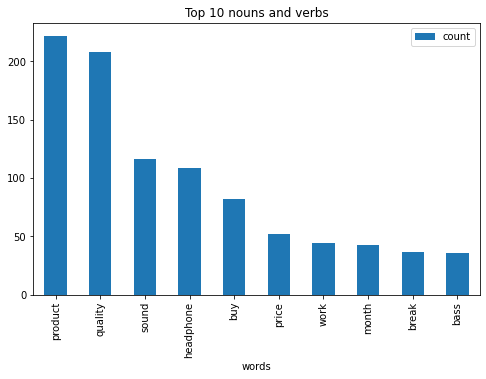

In [123]:
# Visualizing results (Barchart for top 10[nouns + verbs])

wd_df[0:10].plot.bar(x='words',figsize=(8,5),title='Top 10 nouns and verbs');
plt.show()

# Word Cloud

In [124]:
from PIL import Image

<Figure size 432x288 with 0 Axes>

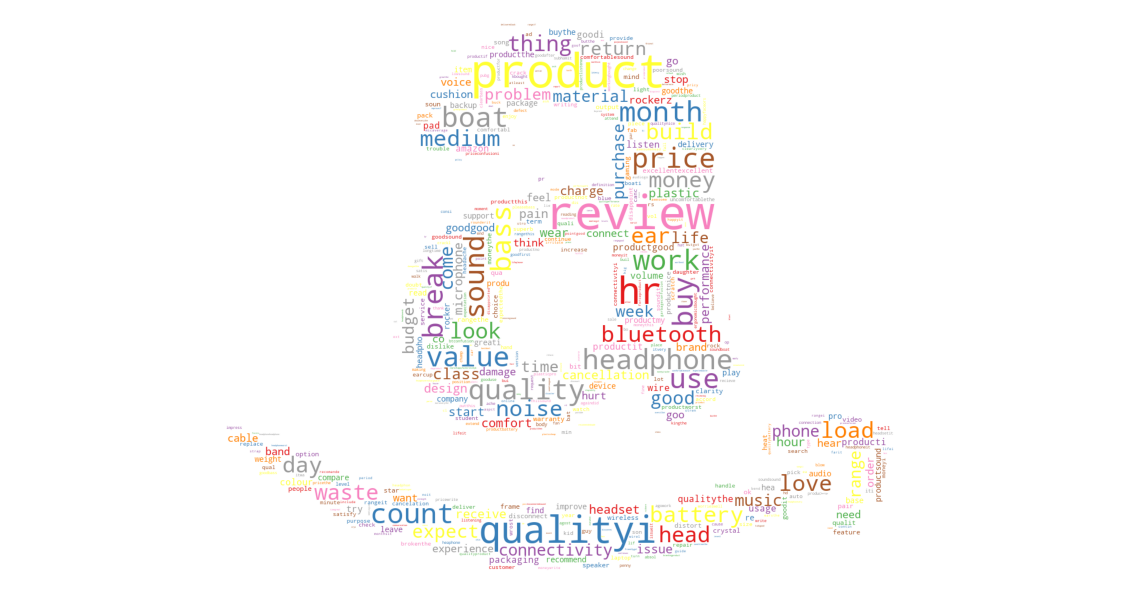

In [125]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('words')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
mask = np.array(Image.open("D:\\DATA SCIENCE\\Project\\Sentiment Analysis on Amazon Product Reviews\\amazon-icon-6.png"))
wordcloud = WordCloud(width=10000,height=5000,background_color='white',max_words=500,
                   colormap='Set1', mask=mask, stopwords=STOPWORDS).generate(str(wd_df))
plt.savefig("amazon.png", format="png")
plot_cloud(wordcloud)
plt.show()

## Sentiment Analysis for each word

In [126]:
#sentiment
wd_df['words'][:5].apply(lambda x: TextBlob(x).sentiment)
wd_df['sentiment'] = wd_df['words'].apply(lambda x: TextBlob(x).sentiment[0] )
wd_df[['words','sentiment']]

words  sentiment
0                     product   0.000000
1                     quality   0.000000
2                       sound   0.400000
3                   headphone   0.000000
4                         buy   0.000000
5                       price   0.000000
6                        work   0.000000
7                       month   0.000000
8                       break   0.000000
9                        bass  -0.150000
10                       boat   0.000000
11                        use   0.000000
12                      value   0.000000
13                    battery   0.000000
14                      money   0.000000
15                        ear   0.000000
16                       load   0.000000
17                     medium   0.000000
18                        day   0.000000
19                      noise   0.000000
20                      build   0.000000
21                  bluetooth   0.000000
22                       love   0.500000
23                      thing   0.000000
24                       look   0.000000
25                     review   0.000000
26                       head   0.000000
27                      waste  -0.200000
28                     expect   0.000000
29                       good   0.700000
30                     return   0.000000
31                       come   0.000000
32               connectivity   0.000000
33                   purchase   0.000000
34                      music   0.000000
35                   material   0.000000
36                      range   0.000000
37                      phone   0.000000
38                    problem   0.000000
39                      class   0.000000
40                       week   0.000000
41                     budget   0.000000
42                       time   0.000000
43                       life   0.000000
44               cancellation   0.000000
45                     charge   0.000000
46                      start   0.000000
47                     design   0.000000
48                    comfort   0.000000
49                       pain   0.000000
50                    receive   0.000000
51                 microphone   0.000000
52                    headset   0.000000
53                performance   0.000000
54                       wear   0.000000
55                      issue   0.000000
56                    plastic   0.000000
57                       hour   0.000000
58                 experience   0.000000
59                       want   0.000000
60                       hurt   0.000000
61                    rockerz   0.000000
62                       feel   0.000000
63                    cushion   0.000000
64                      think   0.000000
65                   goodgood   0.000000
66                       stop   0.000000
67                    connect   0.000000
68                       band   0.000000
69                      brand   0.000000
70                      voice   0.000000
71                         go   0.000000
72                       hear   0.000000
73                         co   0.000000
74                     damage   0.000000
75                      order   0.000000
76                      cable   0.000000
77                       need   0.000000
78                        goo   0.000000
79                productgood   0.000000
80                        try   0.000000
81                       wire   0.000000
82                     colour   0.000000
83                        pad   0.000000
84                      usage   0.000000
85                     listen   0.000000
86                 qualitythe   0.000000
87                   producti   0.000000
88                      goodi   0.000000
89                     volume   0.000000
90                  productit   0.000000
91                     amazon   0.000000
92                  packaging   0.000000
93                 productthe   0.000000
94                       find   0.000000
95                        pro   0.000000
96                       base  -0.800000
97    

In [127]:
#  subjectivity and polarity 
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

wd_df['Subjectivity'] = wd_df['words'].apply(getSubjectivity)
wd_df['Polarity'] = wd_df['words'].apply(getPolarity)


In [128]:
wd_df

words  count  sentiment  Subjectivity  Polarity
0                     product    222   0.000000      0.000000  0.000000
1                     quality    208   0.000000      0.000000  0.000000
2                       sound    116   0.400000      0.400000  0.400000
3                   headphone    109   0.000000      0.000000  0.000000
4                         buy     82   0.000000      0.000000  0.000000
5                       price     52   0.000000      0.000000  0.000000
6                        work     44   0.000000      0.000000  0.000000
7                       month     43   0.000000      0.000000  0.000000
8                       break     37   0.000000      0.000000  0.000000
9                        bass     36  -0.150000      0.500000 -0.150000
10                       boat     34   0.000000      0.000000  0.000000
11                        use     33   0.000000      0.000000  0.000000
12                      value     33   0.000000      0.000000  0.000000
13                    battery     33   0.000000      0.000000  0.000000
14                      money     30   0.000000      0.000000  0.000000
15                        ear     30   0.000000      0.000000  0.000000
16                       load     30   0.000000      0.000000  0.000000
17                     medium     28   0.000000      0.000000  0.000000
18                        day     28   0.000000      0.000000  0.000000
19                      noise     23   0.000000      0.000000  0.000000
20                      build     22   0.000000      0.000000  0.000000
21                  bluetooth     22   0.000000      0.000000  0.000000
22                       love     21   0.500000      0.600000  0.500000
23                      thing     20   0.000000      0.000000  0.000000
24                       look     18   0.000000      0.000000  0.000000
25                     review     16   0.000000      0.000000  0.000000
26                       head     15   0.000000      0.000000  0.000000
27                      waste     14  -0.200000      0.000000 -0.200000
28                     expect     14   0.000000      0.000000  0.000000
29                       good     13   0.700000      0.600000  0.700000
30                     return     13   0.000000      0.000000  0.000000
31                       come     13   0.000000      0.000000  0.000000
32               connectivity     13   0.000000      0.000000  0.000000
33                   purchase     12   0.000000      0.000000  0.000000
34                      music     12   0.000000      0.000000  0.000000
35                   material     12   0.000000      0.000000  0.000000
36                      range     11   0.000000      0.000000  0.000000
37                      phone     11   0.000000      0.000000  0.000000
38                    problem     11   0.000000      0.000000  0.000000
39                      class     11   0.000000      0.000000  0.000000
40                       week     11   0.000000      0.000000  0.000000
41                     budget     11   0.000000      0.000000  0.000000
42                       time     11   0.000000      0.000000  0.000000
43                       life     11   0.000000      0.000000  0.000000
44               cancellation     10   0.000000      0.000000  0.000000
45                     charge     10   0.000000      0.000000  0.000000
46                      start      9   0.000000      0.000000  0.000000
47                     design      9   0.000000      0.000000  0.000000
48                    comfort      9   0.000000      0.000000  0.000000
49                       pain      8   0.000000      0.000000  0.000000
50                    receive      8   0.000000      0.000000  0.000000
51                 microphone      8   0.000000      0.000000  0.000000
52                    headset      8   0.000000      0.000000  0.000000
53                performance      8   0.000000      0.000000  0.000000
54                       wear      8   0.000000      0.000000  0

In [129]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
wd_df['Analysis'] = wd_df['Polarity'].apply(getAnalysis)

In [130]:
wd_df

words  count  sentiment  Subjectivity  Polarity  \
0                     product    222   0.000000      0.000000  0.000000   
1                     quality    208   0.000000      0.000000  0.000000   
2                       sound    116   0.400000      0.400000  0.400000   
3                   headphone    109   0.000000      0.000000  0.000000   
4                         buy     82   0.000000      0.000000  0.000000   
5                       price     52   0.000000      0.000000  0.000000   
6                        work     44   0.000000      0.000000  0.000000   
7                       month     43   0.000000      0.000000  0.000000   
8                       break     37   0.000000      0.000000  0.000000   
9                        bass     36  -0.150000      0.500000 -0.150000   
10                       boat     34   0.000000      0.000000  0.000000   
11                        use     33   0.000000      0.000000  0.000000   
12                      value     33   0.000000      0.000000  0.000000   
13                    battery     33   0.000000      0.000000  0.000000   
14                      money     30   0.000000      0.000000  0.000000   
15                        ear     30   0.000000      0.000000  0.000000   
16                       load     30   0.000000      0.000000  0.000000   
17                     medium     28   0.000000      0.000000  0.000000   
18                        day     28   0.000000      0.000000  0.000000   
19                      noise     23   0.000000      0.000000  0.000000   
20                      build     22   0.000000      0.000000  0.000000   
21                  bluetooth     22   0.000000      0.000000  0.000000   
22                       love     21   0.500000      0.600000  0.500000   
23                      thing     20   0.000000      0.000000  0.000000   
24                       look     18   0.000000      0.000000  0.000000   
25                     review     16   0.000000      0.000000  0.000000   
26                       head     15   0.000000      0.000000  0.000000   
27                      waste     14  -0.200000      0.000000 -0.200000   
28                     expect     14   0.000000      0.000000  0.000000   
29                       good     13   0.700000      0.600000  0.700000   
30                     return     13   0.000000      0.000000  0.000000   
31                       come     13   0.000000      0.000000  0.000000   
32               connectivity     13   0.000000      0.000000  0.000000   
33                   purchase     12   0.000000      0.000000  0.000000   
34                      music     12   0.000000      0.000000  0.000000   
35                   material     12   0.000000      0.000000  0.000000   
36                      range     11   0.000000      0.000000  0.000000   
37                      phone     11   0.000000      0.000000  0.000000   
38                    problem     11   0.000000      0.000000  0.000000   
39                      class     11   0.000000      0.000000  0.000000   
40                       week     11   0.000000      0.000000  0.000000   
41                     budget     11   0.000000      0.000000  0.000000   
42                       time     11   0.000000      0.000000  0.000000   
43                       life     11   0.000000      0.000000  0.000000   
44               cancellation     10   0.000000      0.000000  0.000000   
45                     charge     10   0.000000      0.000000  0.000000   
46                      start      9   0.000000      0.000000  0.000000   
47                     design      9   0.000000      0.000000  0.000000   
48                    comfort      9   0.000000      0.000000  0.000000   
49                       pain      8   0.000000      0.000000  0.000000   
50                    receive      8   0.000000      0.000000  0.000000   
51                 microphone      8   0.000000      0.000000  0.000000   
52                    headset      8   0.000000  

In [131]:
wd_df['Analysis'].count

<bound method Series.count of 0       Neutral
1       Neutral
2      Positive
3       Neutral
4       Neutral
5       Neutral
6       Neutral
7       Neutral
8       Neutral
9      Negative
10      Neutral
11      Neutral
12      Neutral
13      Neutral
14      Neutral
15      Neutral
16      Neutral
17      Neutral
18      Neutral
19      Neutral
20      Neutral
21      Neutral
22     Positive
23      Neutral
24      Neutral
25      Neutral
26      Neutral
27     Negative
28      Neutral
29     Positive
30      Neutral
31      Neutral
32      Neutral
33      Neutral
34      Neutral
35      Neutral
36      Neutral
37      Neutral
38      Neutral
39      Neutral
40      Neutral
41      Neutral
42      Neutral
43      Neutral
44      Neutral
45      Neutral
46      Neutral
47      Neutral
48      Neutral
49      Neutral
50      Neutral
51      Neutral
52      Neutral
53      Neutral
54      Neutral
55      Neutral
56      Neutral
57      Neutral
58      Neutral
59      Neutral
60      Ne

<AxesSubplot:>

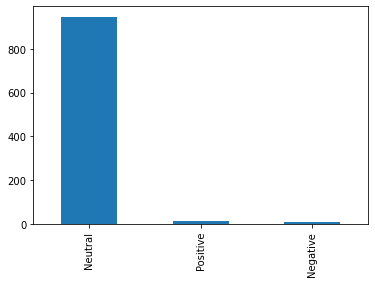

In [132]:
wd_df['Analysis'].value_counts().plot(kind='bar')

# Sentiment Analysis for each review

In [133]:
amazon['reviews'][:5].apply(lambda x: TextBlob(x).sentiment)


0                                  (0.8, 1.0)
1                           (0.25125, 0.5925)
2                (-0.050000000000000044, 0.8)
3                                  (0.0, 0.0)
4    (0.1865679442508711, 0.5213008130081301)
Name: reviews, dtype: object

In [134]:
amazon['sentiment'] = amazon['reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
amazon[['reviews','sentiment']]

reviews     sentiment
0                       happy buy productnice product   8.000000e-01
1    amazingly amazonit hrs use watch lecture hrs b...  2.512500e-01
2    base kingthe base good value range moneyi like... -5.000000e-02
3    head phone plastic band break outthis product ...  0.000000e+00
4    cheap plastic average product sound distort hi...  1.865679e-01
5    value moneysound crystal clearbass pretty good...  2.500000e-01
6    buy pleasebass disgusting range good try pubg ... -1.500000e-01
7    cheap qualityi month headphone literally break...  1.114583e-01
8    month reviewmarvelous performanceif watch movi...  3.562500e-01
9    break monthi huge fan boat purchase headphone ...  2.500000e-02
10   product great recieved product instead brand n...  3.464286e-01
11   boat product againdid month break moth amazon ... -1.875000e-01
12                            value money productnice   0.000000e+00
13   bad productsplz buy product half hour ear star... -4.333333e-01
14   perfect free worrieswell writing review month ...  4.290196e-01
15   nice soundboat rocker sound product rs treble ...  3.916667e-01
16   amazing btconfusion headphonesthe medium load ...  3.033926e-01
17   useless headphonespoor basic headphone highly ...  9.761905e-03
18   break month return warranty periodproduct brea... -1.000000e-01
19   worth price productno voice cancellation produ...  3.057692e-01
20   goodmy ear head stare pain uncomfortable bass ...  1.125000e-01
21   pro consi like start pro sound good battery li...  3.500000e-01
22   goodafter reading review people like people lo...  2.632813e-01
23                            ok supersuper mind blow   5.000000e-01
24   bad product wish star itthis product poor buil... -2.117647e-01
25   problem itthe headphone kinda good term audio ...  5.000000e-01
26   sound quality great build quality poorsound go...  4.517857e-01
27   poor ergonomicsbought month agowork fine aux c...  3.003968e-01
28   bluetooth connectivitysound quality doubt good...  1.112500e-01
29   disappointed duplicate productdont purchase bo...  2.500000e-02
30   good priceconfusioni buy attend online class c...  4.785714e-01
31   okay greatthis product okay greati rate - star...  3.571429e-02
32   battery lifei earphone month sure fairly satis...  2.300000e-01
33   average productfor price bluetooth star produc...  2.066667e-01
34   uncomfortable pain earsi headphone day experie...  2.602041e-01
35   work good sound quality vocal crystal clear ni...  2.067602e-01
36   stupid waste moneyi believe experience headpho... -2.523810e-01
37   noise cancellation son hear right happyfaceors...  4.300000e-01
38   worth itwa work fine st week start hear crackl... -1.845238e-02
39   technical issueit month productmy review absol...  8.000000e-02
40   average headphone good mic qualityhey purchase...  2.263333e-01
41   decent product reasonable pricefirst hat boat ...  1.722222e-01
42   cheap version high pricethe product come good ...  3.683333e-02
43   balanced sound longtime ache ear cause cufs ki...  2.543562e-01
44   good product price rangethe medium load sound ...  3.366667e-01
45   cheap plastic average product break month bad ... -1.708333e-01
46   bad mic mic workingbought receive amazon june ... -7.000000e-01
47   bass goodbass sound quality good making end he...  1.357143e-01
48   averagethis headphone good non - bass lover li...  2.450000e-01
49   cristal clear sound stylish perfect moment lif...  4.483333e-01
50   great product excellent service amazonamazon a...  5.421429e-01
51   exellent buy lot good qualitythis brilliant pr...  2.853413e-01
52   excellent head phone great value moneythis par...  5.451389e-01
53   good sound quality poor quality plasticpro - s...  2.721212e-01
54   single subhamit cool stylish high quality hd b...  3.877143e-01
55   good betterit fragile wire come try extend hea...  3.158333e-01
56   trouble bluetooth connectivityit problem bluet...  1.769231e-01
57   mic disappointingthe quality good dissat

## Subjectivity and Polarity 

In [135]:
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

amazon['Subjectivity'] = amazon['reviews'].apply(getSubjectivity)
amazon['Polarity'] = amazon['reviews'].apply(getPolarity)


In [136]:
amazon

urls_counts  rating                                            reviews  \
0              0     5.0                     happy buy productnice product    
1              0     4.0  amazingly amazonit hrs use watch lecture hrs b...   
2              0     4.0  base kingthe base good value range moneyi like...   
3              0     1.0  head phone plastic band break outthis product ...   
4              0     2.0  cheap plastic average product sound distort hi...   
5              0     5.0  value moneysound crystal clearbass pretty good...   
6              0     1.0  buy pleasebass disgusting range good try pubg ...   
7              0     1.0  cheap qualityi month headphone literally break...   
8              0     4.0  month reviewmarvelous performanceif watch movi...   
9              0     1.0  break monthi huge fan boat purchase headphone ...   
10             0     4.0  product great recieved product instead brand n...   
11             0     1.0  boat product againdid month break moth amazon ...   
12             0     4.0                           value money productnice    
13             0     1.0  bad productsplz buy product half hour ear star...   
14             0     5.0  perfect free worrieswell writing review month ...   
15             0     5.0  nice soundboat rocker sound product rs treble ...   
16             0     5.0  amazing btconfusion headphonesthe medium load ...   
17             0     1.0  useless headphonespoor basic headphone highly ...   
18             0     1.0  break month return warranty periodproduct brea...   
19             0     1.0  worth price productno voice cancellation produ...   
20             0     1.0  goodmy ear head stare pain uncomfortable bass ...   
21             0     4.0  pro consi like start pro sound good battery li...   
22             0     5.0  goodafter reading review people like people lo...   
23             0     5.0                           ok supersuper mind blow    
24             0     2.0  bad product wish star itthis product poor buil...   
25             0     2.0  problem itthe headphone kinda good term audio ...   
26             0     3.0  sound quality great build quality poorsound go...   
27             0     2.0  poor ergonomicsbought month agowork fine aux c...   
28             0     4.0  bluetooth connectivitysound quality doubt good...   
29             0     1.0  disappointed duplicate productdont purchase bo...   
30             0     5.0  good priceconfusioni buy attend online class c...   
31             0     1.0  okay greatthis product okay greati rate - star...   
32             0     5.0  battery lifei earphone month sure fairly satis...   
33             0     4.0  average productfor price bluetooth star produc...   
34             0     3.0  uncomfortable pain earsi headphone day experie...   
35             0     5.0  work good sound quality vocal crystal clear ni...   
36             0     1.0  stupid waste moneyi believe experience headpho...   
37             0     5.0  noise cancellation son hear right happyfaceors...   
38             0     1.0  worth itwa work fine st week start hear crackl...   
39             0     1.0  technical issueit month productmy review absol...   
40             0     4.0  average headphone good mic qualityhey purchase...   
41             0     5.0  decent product reasonable pricefirst hat boat ...   
42             0     2.0  cheap version high pricethe product come good ...   
43             0     3.0  balanced sound longtime ache ear cause cufs ki...   
44             0     3.0  good product price rangethe medium load sound ...   
45             0     1.0  cheap plastic average product break month bad ...   
46             0     1.0  bad mic mic workingbought receive amazon june ...   
47             0     3.0  bass goodbass sound quality good making end he...   
48             0     4.0  averagethis headphone good non - bass lover li...   
49             0     5.0  cristal clear sound stylish p

In [137]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

    
amazon['Analysis'] = amazon['Polarity'].apply(getAnalysis)

In [138]:
amazon

urls_counts  rating                                            reviews  \
0              0     5.0                     happy buy productnice product    
1              0     4.0  amazingly amazonit hrs use watch lecture hrs b...   
2              0     4.0  base kingthe base good value range moneyi like...   
3              0     1.0  head phone plastic band break outthis product ...   
4              0     2.0  cheap plastic average product sound distort hi...   
5              0     5.0  value moneysound crystal clearbass pretty good...   
6              0     1.0  buy pleasebass disgusting range good try pubg ...   
7              0     1.0  cheap qualityi month headphone literally break...   
8              0     4.0  month reviewmarvelous performanceif watch movi...   
9              0     1.0  break monthi huge fan boat purchase headphone ...   
10             0     4.0  product great recieved product instead brand n...   
11             0     1.0  boat product againdid month break moth amazon ...   
12             0     4.0                           value money productnice    
13             0     1.0  bad productsplz buy product half hour ear star...   
14             0     5.0  perfect free worrieswell writing review month ...   
15             0     5.0  nice soundboat rocker sound product rs treble ...   
16             0     5.0  amazing btconfusion headphonesthe medium load ...   
17             0     1.0  useless headphonespoor basic headphone highly ...   
18             0     1.0  break month return warranty periodproduct brea...   
19             0     1.0  worth price productno voice cancellation produ...   
20             0     1.0  goodmy ear head stare pain uncomfortable bass ...   
21             0     4.0  pro consi like start pro sound good battery li...   
22             0     5.0  goodafter reading review people like people lo...   
23             0     5.0                           ok supersuper mind blow    
24             0     2.0  bad product wish star itthis product poor buil...   
25             0     2.0  problem itthe headphone kinda good term audio ...   
26             0     3.0  sound quality great build quality poorsound go...   
27             0     2.0  poor ergonomicsbought month agowork fine aux c...   
28             0     4.0  bluetooth connectivitysound quality doubt good...   
29             0     1.0  disappointed duplicate productdont purchase bo...   
30             0     5.0  good priceconfusioni buy attend online class c...   
31             0     1.0  okay greatthis product okay greati rate - star...   
32             0     5.0  battery lifei earphone month sure fairly satis...   
33             0     4.0  average productfor price bluetooth star produc...   
34             0     3.0  uncomfortable pain earsi headphone day experie...   
35             0     5.0  work good sound quality vocal crystal clear ni...   
36             0     1.0  stupid waste moneyi believe experience headpho...   
37             0     5.0  noise cancellation son hear right happyfaceors...   
38             0     1.0  worth itwa work fine st week start hear crackl...   
39             0     1.0  technical issueit month productmy review absol...   
40             0     4.0  average headphone good mic qualityhey purchase...   
41             0     5.0  decent product reasonable pricefirst hat boat ...   
42             0     2.0  cheap version high pricethe product come good ...   
43             0     3.0  balanced sound longtime ache ear cause cufs ki...   
44             0     3.0  good product price rangethe medium load sound ...   
45             0     1.0  cheap plastic average product break month bad ...   
46             0     1.0  bad mic mic workingbought receive amazon june ...   
47             0     3.0  bass goodbass sound quality good making end he...   
48             0     4.0  averagethis headphone good non - bass lover li...   
49             0     5.0  cristal clear sound stylish p

<AxesSubplot:>

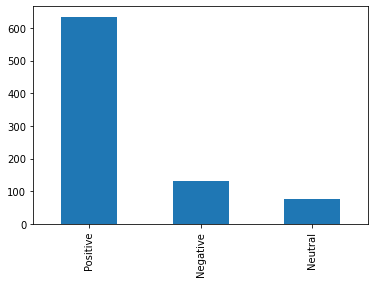

In [139]:
amazon['Analysis'].value_counts().plot(kind='bar')

In [140]:
amazon

urls_counts  rating                                            reviews  \
0              0     5.0                     happy buy productnice product    
1              0     4.0  amazingly amazonit hrs use watch lecture hrs b...   
2              0     4.0  base kingthe base good value range moneyi like...   
3              0     1.0  head phone plastic band break outthis product ...   
4              0     2.0  cheap plastic average product sound distort hi...   
5              0     5.0  value moneysound crystal clearbass pretty good...   
6              0     1.0  buy pleasebass disgusting range good try pubg ...   
7              0     1.0  cheap qualityi month headphone literally break...   
8              0     4.0  month reviewmarvelous performanceif watch movi...   
9              0     1.0  break monthi huge fan boat purchase headphone ...   
10             0     4.0  product great recieved product instead brand n...   
11             0     1.0  boat product againdid month break moth amazon ...   
12             0     4.0                           value money productnice    
13             0     1.0  bad productsplz buy product half hour ear star...   
14             0     5.0  perfect free worrieswell writing review month ...   
15             0     5.0  nice soundboat rocker sound product rs treble ...   
16             0     5.0  amazing btconfusion headphonesthe medium load ...   
17             0     1.0  useless headphonespoor basic headphone highly ...   
18             0     1.0  break month return warranty periodproduct brea...   
19             0     1.0  worth price productno voice cancellation produ...   
20             0     1.0  goodmy ear head stare pain uncomfortable bass ...   
21             0     4.0  pro consi like start pro sound good battery li...   
22             0     5.0  goodafter reading review people like people lo...   
23             0     5.0                           ok supersuper mind blow    
24             0     2.0  bad product wish star itthis product poor buil...   
25             0     2.0  problem itthe headphone kinda good term audio ...   
26             0     3.0  sound quality great build quality poorsound go...   
27             0     2.0  poor ergonomicsbought month agowork fine aux c...   
28             0     4.0  bluetooth connectivitysound quality doubt good...   
29             0     1.0  disappointed duplicate productdont purchase bo...   
30             0     5.0  good priceconfusioni buy attend online class c...   
31             0     1.0  okay greatthis product okay greati rate - star...   
32             0     5.0  battery lifei earphone month sure fairly satis...   
33             0     4.0  average productfor price bluetooth star produc...   
34             0     3.0  uncomfortable pain earsi headphone day experie...   
35             0     5.0  work good sound quality vocal crystal clear ni...   
36             0     1.0  stupid waste moneyi believe experience headpho...   
37             0     5.0  noise cancellation son hear right happyfaceors...   
38             0     1.0  worth itwa work fine st week start hear crackl...   
39             0     1.0  technical issueit month productmy review absol...   
40             0     4.0  average headphone good mic qualityhey purchase...   
41             0     5.0  decent product reasonable pricefirst hat boat ...   
42             0     2.0  cheap version high pricethe product come good ...   
43             0     3.0  balanced sound longtime ache ear cause cufs ki...   
44             0     3.0  good product price rangethe medium load sound ...   
45             0     1.0  cheap plastic average product break month bad ...   
46             0     1.0  bad mic mic workingbought receive amazon june ...   
47             0     3.0  bass goodbass sound quality good making end he...   
48             0     4.0  averagethis headphone good non - bass lover li...   
49             0     5.0  cristal clear sound stylish p

## Generate Positive Reviews Word Cloud

In [141]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,max_words=300,background_color='black')

In [142]:
Positive = wc.generate(amazon[amazon['Polarity']>0]['reviews'].str.cat(sep=""))

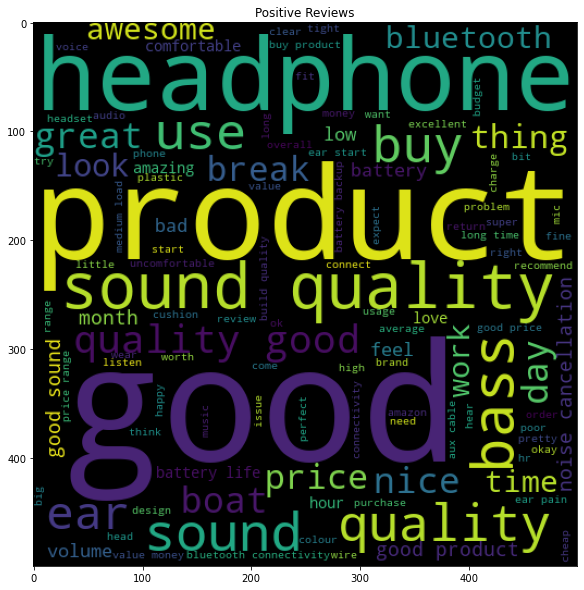

In [143]:
plt.figure(figsize=(10,10))
plt.imshow(Positive)
plt.title('Positive Reviews')
plt.show()

## Generate Negative Reviews Word Cloud

In [144]:
Negative=wc.generate(amazon[amazon['Polarity']<0]['reviews'].str.cat(sep=""))

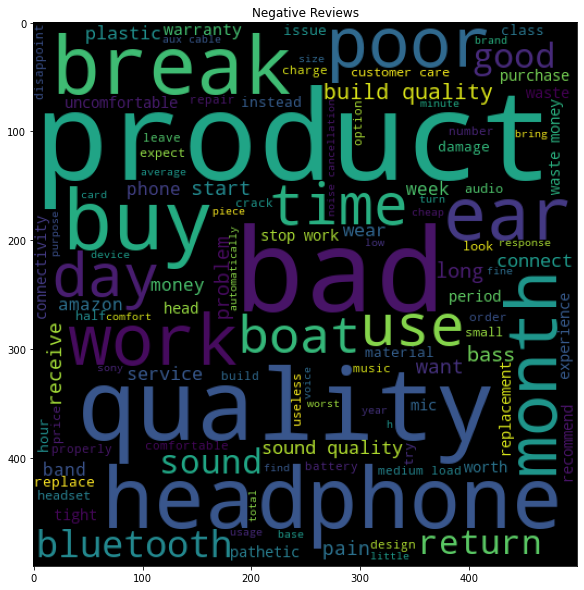

In [145]:
plt.figure(figsize=(10,10))
plt.imshow(Negative)
plt.title('Negative Reviews')
plt.show()

## Generate Neutral Reviews Word Cloud

In [146]:
Neutral = wc.generate(amazon[amazon['Polarity']==0]['reviews'].str.cat(sep=""))

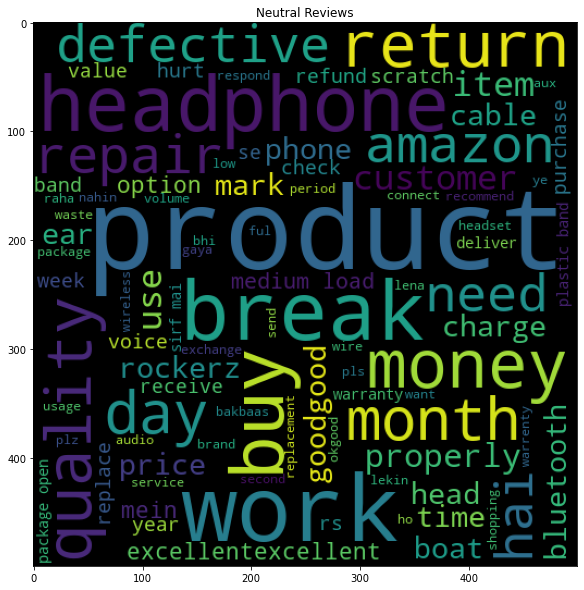

In [147]:
plt.figure(figsize=(10,10))
plt.imshow(Neutral)
plt.title('Neutral Reviews')
plt.show()

# Model Building 

In [148]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
vectorizer=TfidfVectorizer(max_features=10000)

In [149]:
x=vectorizer.fit_transform(amazon['reviews'])

In [150]:
#rows, reviews
x.shape

(840, 3072)

### LabelEncoder for classification Model

In [151]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [152]:
amazon['target']=encoder.fit_transform(amazon['Analysis'])
amazon

urls_counts  rating                                            reviews  \
0              0     5.0                     happy buy productnice product    
1              0     4.0  amazingly amazonit hrs use watch lecture hrs b...   
2              0     4.0  base kingthe base good value range moneyi like...   
3              0     1.0  head phone plastic band break outthis product ...   
4              0     2.0  cheap plastic average product sound distort hi...   
5              0     5.0  value moneysound crystal clearbass pretty good...   
6              0     1.0  buy pleasebass disgusting range good try pubg ...   
7              0     1.0  cheap qualityi month headphone literally break...   
8              0     4.0  month reviewmarvelous performanceif watch movi...   
9              0     1.0  break monthi huge fan boat purchase headphone ...   
10             0     4.0  product great recieved product instead brand n...   
11             0     1.0  boat product againdid month break moth amazon ...   
12             0     4.0                           value money productnice    
13             0     1.0  bad productsplz buy product half hour ear star...   
14             0     5.0  perfect free worrieswell writing review month ...   
15             0     5.0  nice soundboat rocker sound product rs treble ...   
16             0     5.0  amazing btconfusion headphonesthe medium load ...   
17             0     1.0  useless headphonespoor basic headphone highly ...   
18             0     1.0  break month return warranty periodproduct brea...   
19             0     1.0  worth price productno voice cancellation produ...   
20             0     1.0  goodmy ear head stare pain uncomfortable bass ...   
21             0     4.0  pro consi like start pro sound good battery li...   
22             0     5.0  goodafter reading review people like people lo...   
23             0     5.0                           ok supersuper mind blow    
24             0     2.0  bad product wish star itthis product poor buil...   
25             0     2.0  problem itthe headphone kinda good term audio ...   
26             0     3.0  sound quality great build quality poorsound go...   
27             0     2.0  poor ergonomicsbought month agowork fine aux c...   
28             0     4.0  bluetooth connectivitysound quality doubt good...   
29             0     1.0  disappointed duplicate productdont purchase bo...   
30             0     5.0  good priceconfusioni buy attend online class c...   
31             0     1.0  okay greatthis product okay greati rate - star...   
32             0     5.0  battery lifei earphone month sure fairly satis...   
33             0     4.0  average productfor price bluetooth star produc...   
34             0     3.0  uncomfortable pain earsi headphone day experie...   
35             0     5.0  work good sound quality vocal crystal clear ni...   
36             0     1.0  stupid waste moneyi believe experience headpho...   
37             0     5.0  noise cancellation son hear right happyfaceors...   
38             0     1.0  worth itwa work fine st week start hear crackl...   
39             0     1.0  technical issueit month productmy review absol...   
40             0     4.0  average headphone good mic qualityhey purchase...   
41             0     5.0  decent product reasonable pricefirst hat boat ...   
42             0     2.0  cheap version high pricethe product come good ...   
43             0     3.0  balanced sound longtime ache ear cause cufs ki...   
44             0     3.0  good product price rangethe medium load sound ...   
45             0     1.0  cheap plastic average product break month bad ...   
46             0     1.0  bad mic mic workingbought receive amazon june ...   
47             0     3.0  bass goodbass sound quality good making end he...   
48             0     4.0  averagethis headphone good non - bass lover li...   
49             0     5.0  cristal clear sound stylish p

In [153]:
y_svc=amazon['target'].values
y_svc

array([2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2,

In [154]:
from sklearn.model_selection import train_test_split   

In [155]:
X_train,X_test,y_train,y_test=train_test_split(x,y_svc,test_size=0.1,random_state=40)

# SVC

In [156]:
from sklearn.svm import SVC
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [157]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[25,20,10,1,0.5],'C':[20,15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [20, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [25, 20, 10, 1, 0.5], 'kernel': ['rbf']}])

In [158]:
gsv.best_params_ , gsv.best_score_ 

({'C': 20, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8268070175438597)

In [159]:
clf = SVC(C= 20, gamma = 25)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 73.80952380952381


array([[ 0,  0, 15],
       [ 0,  1,  7],
       [ 0,  0, 61]], dtype=int64)

# KNN

In [160]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [161]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [162]:
print(grid_search.best_params_)

{'n_neighbors': 7}


In [163]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 78.98%


In [164]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

In [165]:
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [166]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [167]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 82.14285714285714


# Bagging Boosting 

In [168]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.
from sklearn.metrics import classification_report, confusion_matrix

In [169]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object

In [170]:
dcmodel = dcmodel.fit(X_train,y_train) #train decision tree
y_predict = dcmodel.predict(X_test)

In [171]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  80.95238095238095


# Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [173]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

In [174]:
rf.fit(X_train,y_train) # Fitting RandomForestClassifier model from sklearn.ensemble 
rf.estimators_ # 
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels 
rf.n_features_  # Number of input features in model 8 here.

rf.n_outputs_ # Number of outputs when fit performed

rf.oob_score_ 

0.7923280423280423

In [175]:
rf.predict(X_test)

array([0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2])

In [176]:
preds = rf.predict(X_test)
pd.Series(preds).value_counts()

2    67
1     9
0     8
dtype: int64

In [177]:
preds

array([0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2])

In [178]:
# In order to check whether the predictions are correct or wrong we will create a cross tab on y_test data

crosstable = pd.crosstab(y_test,preds)
crosstable

col_0  0  1   2
row_0          
0      6  1   8
1      0  6   2
2      2  2  57

In [179]:
# Final step we will calculate the accuracy of our model

# We are comparing the predicted values with the actual values and calculating mean for the matches
np.mean(preds==y_test)

0.8214285714285714

In [180]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.40      0.75      0.52         8
           1       0.75      0.67      0.71         9
           2       0.93      0.85      0.89        67

    accuracy                           0.82        84
   macro avg       0.69      0.76      0.71        84
weighted avg       0.86      0.82      0.84        84



# Logistic Regression

In [181]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [182]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)


LogisticRegression()

In [183]:
y_pred=classifier.predict(X_train)
y_pred

array([2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,

In [184]:
confusion_matrix = confusion_matrix(y_train,y_pred)
confusion_matrix

array([[ 64,   0,  52],
       [  1,  21,  45],
       [  0,   0, 573]], dtype=int64)

In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.55      0.71       116
           1       1.00      0.31      0.48        67
           2       0.86      1.00      0.92       573

    accuracy                           0.87       756
   macro avg       0.95      0.62      0.70       756
weighted avg       0.89      0.87      0.85       756



### Logistic Regression giving the best result, we can use it for deployment